In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

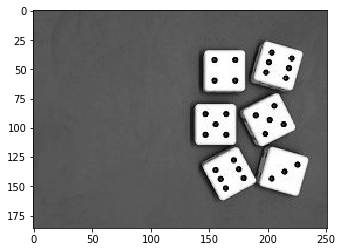

In [177]:
# Load the image
im = cv2.imread('dice02.jpg')

# Convert to grayscale
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')

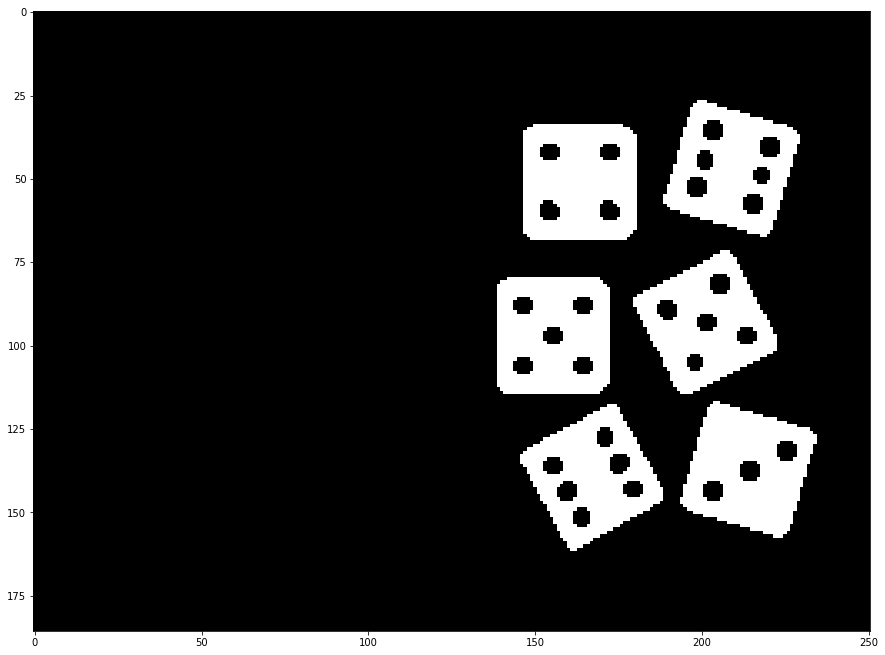

In [190]:
_, thresh = cv2.threshold(im, 180, 255, 0)
# thresh = cv2.GaussianBlur(thresh,(21,21),1)
thresh = cv2.GaussianBlur(thresh,(3,3),1)
thresh = cv2.medianBlur(thresh,3)
_, bw = cv2.threshold(thresh, 180, 255, 0)
plt.figure(figsize=(15,15))
plt.imshow(bw,cmap='gray')

You rolled 6 dice, for a total of 29.


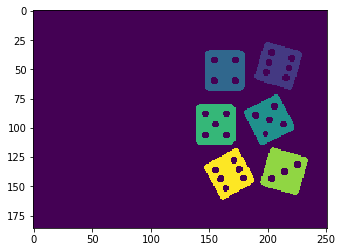

In [191]:
#---- Inverting the image here ----
_, markers1 = cv2.connectedComponents(bw)
_, markers2 = cv2.connectedComponents(cv2.bitwise_not(bw)) # invert the image
num_dice, total = np.amax(markers1), np.amax(markers2)-1
plt.imshow(markers1)
print("You rolled {} dice, for a total of {}.".format(num_dice, total))

In [193]:
a = cv2.SimpleBlobDetector(bw)